# Модель белого карлика.

Дата создания: 06.06.2020

Последнее изменение: 10.06.2020

## Постановка задачи:
Дано: плотность в центре звезды.
Найти: зависимость плотности и давления от расстояния до центра, полную массу M и радиус R звезды.
Считать газ электронов вырожденным и нерелятивистским.

In [1]:
import math
import numpy as np

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

**Модель нерелятивистского вырожденного электронного газа в гелии** (мю = 2)

Параметр - плотность в центре (г/см3)

Возвращается список:

N - число точек,

M - масса звезды в солнечных массах,

R - радиус звезды в солнечных радиусах,

r[N] - значения расстояний от центра,

den[N] - значения плотности для этих расстояний,

ratio - отношение плотности в центре к средней плотности,

q - критерий применимости модели (должно быть число много меньше 1).

In [0]:
def model(den0, step=1e5) :
  h = 1.054E-27 # постоянная Планка
  c = 3e10 # скорость света
  f = 6.67E-8 # постоянная гравитации
  m_prot = 1.67E-24 # масса протона
  m_elec = 9.11E-28 # масса электрона
  pi = math.pi # 3.14...
  mu = 2. # молекулярный вес в случае гелия - 2 электрона на 4 нуклона. 
  K = pow(3*(pi**2), 2/3)*(h**2)/5/m_elec/pow(mu*m_prot, 5/3)
  a = 3/5/K
  M_sol = 2e33 # масса Солнца
  R_sol = 7e10 # радиус Солнца

  # длины массивов данных
  dim = 20000
  # шаг по радиусу
  dr = step
  # расстояние до центра
  r = np.zeros(dim, dtype='float64')
  # плотность
  den = np.zeros(dim, dtype='float64')
  # ускорение свободного падения
  g = np.zeros(dim, dtype='float64')
  # масса внутри сферы радиуса r
  m = np.zeros(dim, dtype='float64')
  # давление
  pressure = np.zeros(dim, dtype='float64')

  r[0] = 0.
  den[0] = den0
  g[0] = 0.
  # g1 - производная по радиусу
  g1 = 4*pi/3*f*den0
  g2 = 0.
  # den1, den2 - 1-я и 2-я производные плотности по радиусу.
  den1 = 0.
  den2 = 0. - a*g1*pow(den0, 1/3)
  pressure[0] = K*pow(den0, 5/3)

  # Проверяем что газ нерелятивистский, q должно быть много меньше 1
  q0 = mu*m_prot*pressure[0]/m_elec/c/c/den0

  for n in range(dim - 1) :
    r[n+1] = r[n] + dr
    g[n+1] = g[n] + g1*dr #+ 0.5*g2*dr*dr # ряд Тейлора
    D1 = den1*dr
    D2 = 0.5*den2*dr*dr
    # Проверяем что газ нерелятивистский, q должно быть много меньше 1
    q = mu*m_prot*pressure[n]/m_elec/c/c/den[n]
    # print(n, den[n], D1, D2, q)
    den[n+1] = den[n] + den1*dr + 0.5*den2*dr*dr # ряд Тейлора
    if den[n+1] < 0 : 
      break
    den1 = 0. - a*g[n+1]*pow(den[n+1], 1/3)
    g1 = 4*pi*f*den[n+1] - 2*g[n+1]/r[n+1]
    #g2 = 4*pi*f*den1 - 2*g[n+1] - 2*r[n+1]*g1
    den2 = 0. - a*(g1*pow(den[n+1], 1/3) + 1/3*g[n+1]*pow(den[n+1], -2/3)*den1)
    m[n+1] = m[n] + 4*pi*r[n]*r[n]*den[n]*dr
    pressure[n+1] = K*pow(den[n+1], 5/3) # уравнение состояния вырожденного газа
    M = m[n]/M_sol
    R = r[n]/R_sol
    N = n

  if (N == dim - 2) :
    print ("Error, increase dim!")
    return
  den_avg = 3*m[n]/4/pi/pow(r[n], 3)
  return (N, M, R, r[:N], den[:N], den0/den_avg, q0)
  

In [0]:
N, M, R, r, den, ratio, q = model(1e5)
print('M=%.4f R=%.5f N=%d ratio=%.3f q=%.3f' % (M, R, N, ratio, q))

M=0.1536 R=0.02337 N=1636 ratio=5.983 q=0.027


In [0]:
for step in (1e5, 1e6, 1e7) :
  N, M, R, r, den, ratio, q = model(1e6, step)
  print('M=%.4f R=%.5f (%.5f) N=%d ratio=%.3f q=%.3f step=%.1f km' % (M, R, m2r(M*M_sol)*R_sol, N, ratio, q, step/1e5))

M=0.4859 R=0.01594 (0.00716) N=11160 ratio=5.993 q=0.127 step=1.0 km
M=0.4855 R=0.01591 (0.00716) N=1114 ratio=5.980 q=0.127 step=10.0 km
M=0.4816 R=0.01557 (0.00718) N=109 ratio=5.787 q=0.127 step=100.0 km


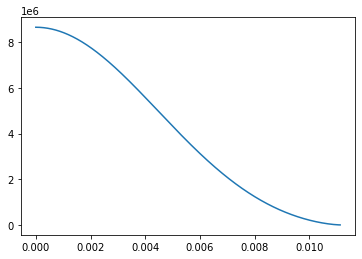

In [0]:
fig = plt.figure()
plt.plot(r/R_sol, den, '-')
plt.show()

In [0]:
def m2r(m) :
  h = 1.054E-27 # постоянная Планка
  c = 3e10 # скорость света
  f = 6.67E-8 # постоянная гравитации
  m_prot = 1.67E-24 # масса протона
  m_elec = 9.11E-28 # масса электрона
  pi = math.pi # 3.14...
  mu = 2. # молекулярный вес в случае гелия - 2 электрона на 4 нуклона. 
  K = pow(3*(pi**2), 2/3)*(h**2)/5/m_elec/pow(mu*m_prot, 5/3)
  M_sol = 2e33 # масса Солнца
  R_sol = 7e10 # радиус Солнца
  return pow(3, 7/3)*K/pow(2, 5/3)/pow(pi, 2/3)/f/R_sol/pow(M_sol, 1/3)/pow(m, 1/3)


den0=100000.000000 M=0.1536 R=0.02340 ratio=5.9896 x=0.027
den0=125892.541179 M=0.1724 R=0.02252 ratio=5.9892 x=0.032
den0=158489.319246 M=0.1934 R=0.02167 ratio=5.9897 x=0.037
den0=199526.231497 M=0.2170 R=0.02085 ratio=5.9899 x=0.044
den0=251188.643151 M=0.2435 R=0.02007 ratio=5.9894 x=0.051
den0=316227.766017 M=0.2732 R=0.01931 ratio=5.9893 x=0.059
den0=398107.170553 M=0.3066 R=0.01858 ratio=5.9893 x=0.069
den0=501187.233627 M=0.3440 R=0.01788 ratio=5.9890 x=0.080
den0=630957.344480 M=0.3859 R=0.01721 ratio=5.9896 x=0.094
den0=794328.234724 M=0.4330 R=0.01656 ratio=5.9890 x=0.109
den0=1000000.000000 M=0.4859 R=0.01594 ratio=5.9932 x=0.127
den0=1258925.411794 M=0.5451 R=0.01534 ratio=5.9935 x=0.149
den0=1584893.192461 M=0.6117 R=0.01476 ratio=5.9890 x=0.173
den0=1995262.314969 M=0.6863 R=0.01421 ratio=5.9892 x=0.202
den0=2511886.431510 M=0.7700 R=0.01367 ratio=5.9918 x=0.235
den0=3162277.660168 M=0.8640 R=0.01316 ratio=5.9887 x=0.275
den0=3981071.705535 M=0.9694 R=0.01266 ratio=5.988

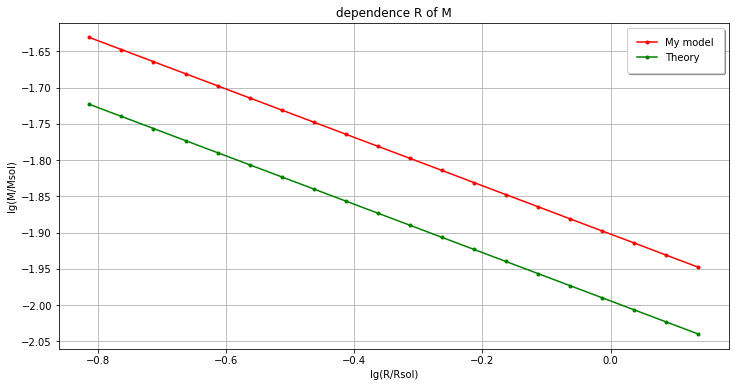

In [0]:
dim = 20
mm = np.zeros(dim)
rr = np.zeros(dim)
x = np.zeros(dim)
y = np.zeros(dim)
z = np.zeros(dim)
for i in range(dim) :
  den0 = 1e5*pow(10, 0.1*i)
  N, mm[i], rr[i], r, den, ratio, q = model(den0)
  print('den0=%f M=%.4f R=%.5f ratio=%.4f x=%.3f' % (den0, mm[i], rr[i], ratio, q))
  x[i] = math.log10(mm[i])
  y[i] = math.log10(rr[i]) 
  z[i] = math.log10(m2r(mm[i])) 

plt.figure(figsize=(12, 6))
ax = plt.axes()
plt.plot(x, y, marker='.', color='red', label='My model')
plt.plot(x, z, marker='.', color='green', label='Theory')
# plt.xlim(0,600)
# plt.ylim(0, 50)
plt.xlabel('lg(R/Rsol)')
plt.ylabel('lg(M/Msol)')
plt.title('dependence R of M')
ax.grid(b=True, which='both')

ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

**Модель ультрарелятивистского вырожденного электронного газа в гелии** (мю = 2)

Параметр - плотность в центре (г/см3)

Возвращается список:

число точек,

масса звезды в солнечных массах,

радиус звезды в солнечных радиусах,

значения расстояний от центра,

значения плотности для этих расстояний,

отношение плотности в центре к средней плотности.

In [0]:
def model_rel(den0, step=1e5) :
  h = 1.054E-27 # постоянная Планка
  c = 3e10 # скорость света
  f = 6.67E-8 # постоянная гравитации
  m_prot = 1.67E-24 # масса протона
  m_elec = 9.11E-28 # масса электрона
  pi = math.pi # 3.14...
  mu = 2. # молекулярный вес в случае гелия - 2 электрона на 4 нуклона. 
  K = pow(3*(pi**2), 2/3)*(h**2)/5/m_elec/pow(mu*m_prot, 5/3)
  a = 3/5/K
  K1 = pow(3*(pi**2), 1/3)/4*h*c*pow(mu*m_prot, -4/3)
  a1 = 3/4/K1
  M_sol = 2e33 # масса Солнца
  R_sol = 7e10 # радиус Солнца

  # длины массивов данных
  dim = 30000
  # шаг по радиусу
  dr = step  
  # расстояние до центра
  r = np.zeros(dim, dtype='float64')
  # плотность
  den = np.zeros(dim, dtype='float64')
  # ускорение свободного падения
  g = np.zeros(dim, dtype='float64')
  # масса внутри сферы радиуса r
  m = np.zeros(dim, dtype='float64')
  # давление
  pressure = np.zeros(dim, dtype='float64')

  r[0] = 0.
  den[0] = den0
  g[0] = 0.
  # g1 - производная по радиусу
  g1 = 4*pi/3*f*den[0]
  # den1, den2 - 1-я и 2-я производные плотности по радиусу.
  den1 = 0.
  den2 = 0. - a1*g1*pow(den[0], 2/3)
  pressure[0] = K1*pow(den[0], 4/3)

# Проверяем что газ ультрарелятивистский, q должно быть много больше 1
  q = mu*m_prot*pressure[0]/m_elec/c/c/den0

  for n in range(dim - 1) :
    r[n+1] = r[n] + dr
    g[n+1] = g[n] + g1*dr # ряд Тейлора
    D1 = den1*dr
    D2 = 0.5*den2*dr*dr
    # Проверяем что газ ультрарелятивистский, q должно быть много больше 1
    q = mu*m_prot*pressure[n]/m_elec/c/c/den[n]
    # print(n, den[n], D1, D2, q)
    den[n+1] = den[n] + den1*dr + 0.5*den2*dr*dr # ряд Тейлора
    if den[n+1] < 1e-5*d : 
      break
    if q > 1 :
      den1 = 0. - a1*g[n+1]*pow(den[n+1], 2/3)
      g1 = 4*pi*f*den[n+1] - 2*g[n+1]/r[n+1]
      den2 = 0. - a1*(g1*pow(den[n+1], 2/3) + 2/3*g[n+1]*pow(den[n+1], -1/3)*den1)
      pressure[n+1] = K1*pow(den[n+1], 4/3) # уравнение состояния ультрарел. вырожденного газа
    else :
      den1 = 0. - a*g[n+1]*pow(den[n+1], 1/3)
      g1 = 4*pi*f*den[n+1] - 2*g[n+1]/r[n+1]
      den2 = 0. - a*(g1*pow(den[n+1], 1/3) + 1/3*g[n+1]*pow(den[n+1], -2/3)*den1)
      pressure[n+1] = K*pow(den[n+1], 5/3) # уравнение состояния нерел. вырожденного газа
    m[n+1] = m[n] + 4*pi*r[n]*r[n]*den[n]*dr
    M = m[n]/M_sol
    R = r[n]/R_sol
    N = n

  if (N == dim - 2) :
    print ("Error, increase dim!")
    return
  den_avg = 3*m[n]/4/pi/pow(r[n], 3)
  return N, M, R, r[:N], den[:N], den0/den_avg, q
  

In [0]:
N, M, R, r, den, ratio, q = model_rel(1e10)

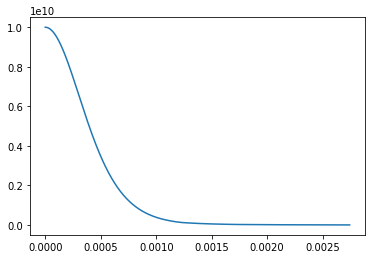

In [0]:
fig = plt.figure()
plt.plot(r/R_sol, den, '-')
plt.show()

den0=100000.000000 M=0.1457 R=0.02325 ratio=6.195
den0=177827.941004 M=0.1899 R=0.02107 ratio=6.292
den0=316227.766017 M=0.2451 R=0.01907 ratio=6.431
den0=562341.325190 M=0.3127 R=0.01724 ratio=6.624
den0=1000000.000000 M=0.3929 R=0.01556 ratio=6.891
den0=1778279.410039 M=0.4849 R=0.01401 ratio=7.252
den0=3162277.660168 M=0.5860 R=0.01259 ratio=7.730
den0=5623413.251903 M=0.6927 R=0.01127 ratio=8.348
den0=10000000.000000 M=0.8001 R=0.01006 ratio=9.133
den0=17782794.100389 M=0.9038 R=0.00894 ratio=10.109
den0=31622776.601684 M=0.9999 R=0.00792 ratio=11.287
den0=56234132.519035 M=1.0856 R=0.00698 ratio=12.685
den0=100000000.000000 M=1.1595 R=0.00613 ratio=14.311
den0=177827941.003892 M=1.2213 R=0.00536 ratio=16.158
den0=316227766.016838 M=1.2716 R=0.00467 ratio=18.195
den0=562341325.190349 M=1.3114 R=0.00405 ratio=20.421
den0=1000000000.000000 M=1.3422 R=0.00349 ratio=22.752
den0=1778279410.038923 M=1.3654 R=0.00299 ratio=25.154
den0=3162277660.168379 M=1.3825 R=0.00256 ratio=27.569
den0

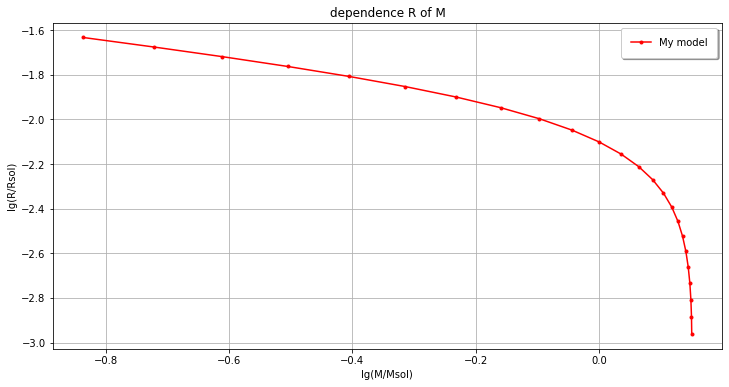

In [49]:
dim = 24
mm = np.zeros(dim)
rr = np.zeros(dim)
x = np.zeros(dim)
y = np.zeros(dim)
d = 1e5
for i in range(dim) :
  den0 = 1e5*pow(10, 0.25*i)
  N, mm[i], rr[i], r, den, ratio = model_gen(den0)
  print('den0=%f M=%.4f R=%.5f ratio=%.3f' % (den0, mm[i]/M_sol, rr[i]/R_sol, ratio))
  x[i] = math.log10(mm[i]/M_sol)
  y[i] = math.log10(rr[i]/R_sol)  
plt.figure(figsize=(12, 6))
ax = plt.axes()
plt.plot(x, y, marker='.', color='red', label='My model')
# plt.plot(x, z, marker='.', color='green', label='Theory')
# plt.xlim(0,600)
# plt.ylim(0, 50)
plt.xlabel('lg(M/Msol)')
plt.ylabel('lg(R/Rsol)')
plt.title('dependence R of M')
ax.grid(b=True, which='both')

ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

In [0]:
h = 1.054E-27 # постоянная Планка
c = 3e10 # скорость света
f = 6.67E-8 # постоянная гравитации
m_prot = 1.67E-24 # масса протона
m_elec = 9.11E-28 # масса электрона

3.14*h/m_elec/c

1.2109623124771314e-10

In [0]:
Mp = pow(h*c/f, 0.5)

In [0]:
Mp


2.1772987128911412e-05

In [0]:
Mp/m_prot


1.3037716843659528e+19

Модель релятивистского вырожденного электронного газа в гелии (мю = 2)

Параметр - плотность в центре (г/см3)

Возвращается список:

число точек,

масса звезды в солнечных массах,

радиус звезды в солнечных радиусах,

значения расстояний от центра,

значения плотности для этих расстояний,

отношение плотности в центре к средней плотности.

In [3]:
def model_gen(den0, step=1e5) :
  h = 1.054E-27 # постоянная Планка
  c = 3e10 # скорость света
  G = 6.67E-8 # постоянная гравитации
  m_prot = 1.67E-24 # масса протона
  m_elec = 9.11E-28 # масса электрона
  pi = math.pi # 3.14...
  mu = 2. # молекулярный вес в случае гелия - 2 электрона на 4 нуклона. 
  K = pow(m_elec, 4)*pow(c, 5)*pow(pi, -2)*pow(h, -3)
  a = pow(3, 1/3)*pow(pi, 2/3)*h/m_elec/c

  def f(x):
    return x*x*(pow(1 + x*x, 0.5) - 1)

  def f1(x):
    return 2*x*(pow(1 + x*x, 0.5) - 1) + pow(x, 3)*pow(1 + x*x, -0.5)

  def F(x) :
    if x < 0.05 :
      return 0.1 * pow(x, 5)
    if x > 20 :
      return 0.25*pow(x, 4) - 1/3*pow(x, 3) + 0.25*pow(x, 2)
    N = 100
    y = np.linspace(0, x, N+1)
    s = 0
    for i in range(N+1) :
      if (i % N == 0) :
        s += f(y[i])
      elif (i % 2) :
        s += 4*f(y[i])
      else :
        s += 2*f(y[i])
    return s*x/N/3

  # длины массивов данных
  dim = 30000
  # шаг по радиусу
  dr = step  
  # расстояние до центра
  r = np.zeros(dim, dtype='float64')
  # плотность
  den = np.zeros(dim, dtype='float64')
  # ускорение свободного падения
  g = np.zeros(dim, dtype='float64')
  # масса внутри сферы радиуса r
  m = np.zeros(dim, dtype='float64')
  # давление
  pressure = np.zeros(dim, dtype='float64')

  r[0] = 0.
  den[0] = den0
  g[0] = 0.
  # g1 - производная по радиусу
  g1 = 4*pi/3*G*den[0]
  # den1, den2 - 1-я и 2-я производные плотности по радиусу.
  den1 = 0.
  nn = den[0]/mu/m_prot
  x = a*pow(nn, 1/3)
  pressure[0] = K*(a/3*pow(nn, 1/3)*f(x) - F(x))

  for n in range(dim - 1) :
    r[n+1] = r[n] + dr
    g[n+1] = g[n] + g1*dr # ряд Тейлора
    D1 = den1*dr
    # D2 = 0.5*den2*dr*dr
    # Проверяем что газ ультрарелятивистский, q должно быть много больше 1
    # q = mu*m_prot*pressure[n]/m_elec/c/c/den[n]
    # print(n, den[n], D1, D2, q)
    den[n+1] = den[n] + den1*dr # + 0.5*den2*dr*dr # ряд Тейлора
    if den[n+1] < 1e-5*den0 : 
      break
    nn = den[n+1]/mu/m_prot
    x = a*pow(nn, 1/3) 
    dpdn = K*(a*a/9*pow(nn, -1/3)*f1(x) - 2/9*a*pow(nn, -2/3)*f(x))
    den1 = 0. - mu*m_prot*den[n+1]*g[n+1]/dpdn
    g1 = 4*pi*G*den[n+1] - 2*g[n+1]/r[n+1]
    pressure[n+1] = K*(a/3*pow(nn, 1/3)*f(x) - F(x))
    m[n+1] = m[n] + 4*pi*r[n]*r[n]*den[n]*dr
    M = m[n]
    R = r[n]
    N = n

  if (N == dim - 2) :
    print ("Error, increase dim!")
    return
  den_avg = 3*m[n]/4/pi/pow(r[n], 3)
  return N, M, R, r[:N], den[:N], den0/den_avg

In [0]:
def F(x) :
  def f(x) :
    return (pow(1 + x*x, 0.5) - 1)*x*x
  if x < 0.05 :
    return 0.1 * pow(x, 5)
  if x > 20 :
    return 0.25*pow(x, 4) - 1/3*pow(x, 3) + 0.25*pow(x, 2)
  N = 100
  y = np.linspace(0, x, N+1)
  s = 0
  for i in range(N+1) :
    if (i % N == 0) :
      s += f(y[i])
    elif (i % 2) :
      s += 4*f(y[i])
    else :
      s += 2*f(y[i])
  return s*x/N/3

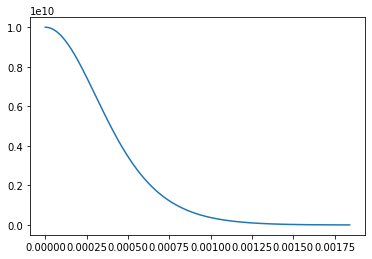

In [5]:
M_sol = 2e33 # масса Солнца
R_sol = 7e10 # радиус Солнца

N, M, R, r, den, ratio = model_gen(1e10)
fig = plt.figure()
plt.plot(r/R_sol, den, '-')
plt.show()

den0=1.000e+05 M=0.1457 R=0.02325 ratio=6.195 N=16273
den0=1.778e+05 M=0.1899 R=0.02107 ratio=6.293 N=16802
den0=3.162e+05 M=0.2451 R=0.01907 ratio=6.432 N=17330
den0=5.623e+05 M=0.3127 R=0.01724 ratio=6.625 N=17850
den0=1.000e+06 M=0.3930 R=0.01556 ratio=6.892 N=18354
den0=1.778e+06 M=0.4849 R=0.01402 ratio=7.254 N=18831
den0=3.162e+06 M=0.5861 R=0.01259 ratio=7.734 N=19270
den0=5.623e+06 M=0.6928 R=0.01127 ratio=8.355 N=19659
den0=1.000e+07 M=0.8003 R=0.01006 ratio=9.142 N=19989
den0=1.778e+07 M=0.9041 R=0.00895 ratio=10.118 N=20250
den0=3.162e+07 M=1.0004 R=0.00792 ratio=11.301 N=20435
den0=5.623e+07 M=1.0863 R=0.00699 ratio=12.704 N=20537
den0=1.000e+08 M=1.1604 R=0.00614 ratio=14.334 N=20553
den0=1.778e+08 M=1.2225 R=0.00537 ratio=16.186 N=20479
den0=3.162e+08 M=1.2731 R=0.00468 ratio=18.239 N=20313
den0=5.623e+08 M=1.3134 R=0.00405 ratio=20.471 N=20058
den0=1.000e+09 M=1.3447 R=0.00350 ratio=22.828 N=19714
den0=1.778e+09 M=1.3686 R=0.00300 ratio=25.261 N=19288
den0=3.162e+09 M=1.

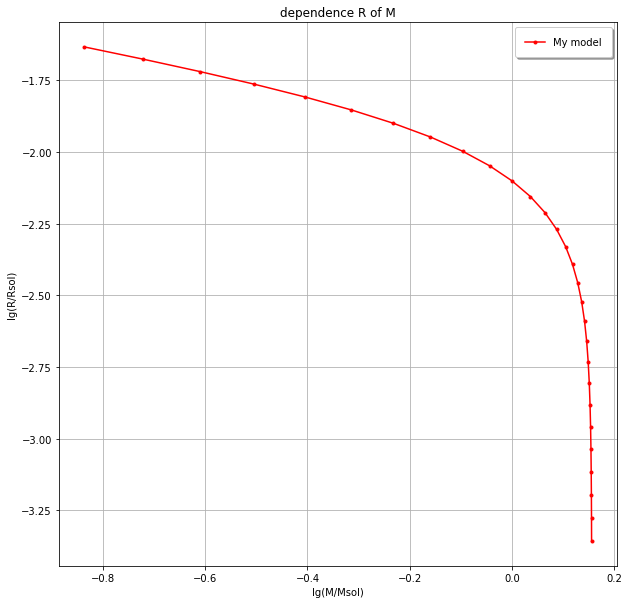

In [6]:
dim = 29
mm = np.zeros(dim)
rr = np.zeros(dim)
x = np.zeros(dim)
y = np.zeros(dim)
d = 1e5
for i in range(dim) :
  den0 = 1e5*pow(10, 0.25*i)
  step = 1e5*pow(10, -math.log10(50)/30*i)
  N, mm[i], rr[i], r, den, ratio = model_gen(den0, step)
  print('den0=%.3e M=%.4f R=%.5f ratio=%.3f N=%d' % (den0, mm[i]/M_sol, rr[i]/R_sol, ratio, N))
  x[i] = math.log10(mm[i]/M_sol)
  y[i] = math.log10(rr[i]/R_sol)  
plt.figure(figsize=(10, 10))
ax = plt.axes()
plt.plot(x, y, marker='.', color='red', label='My model')
# plt.plot(x, z, marker='.', color='green', label='Theory')
# plt.xlim(0,600)
# plt.ylim(0, 50)
plt.xlabel('lg(M/Msol)')
plt.ylabel('lg(R/Rsol)')
plt.title('dependence R of M')
ax.grid(b=True, which='both')

ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

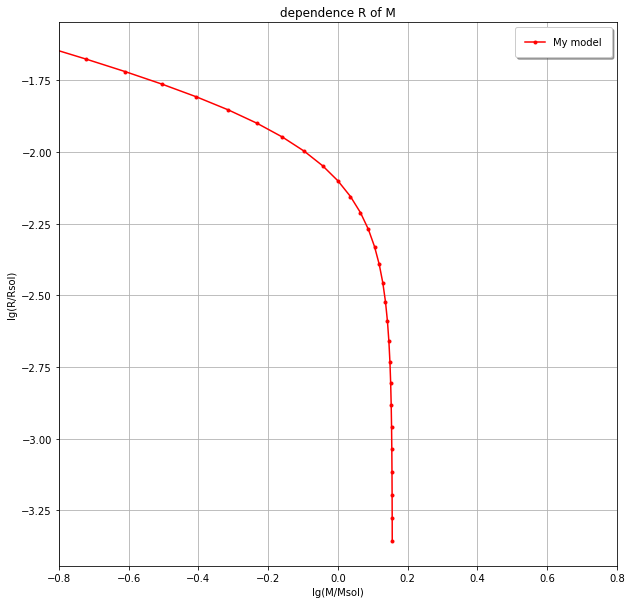

In [7]:
plt.figure(figsize=(10, 10))
ax = plt.axes()
plt.plot(x, y, marker='.', color='red', label='My model')
# plt.plot(x, z, marker='.', color='green', label='Theory')
plt.xlim(-0.8,+0.8)
# plt.ylim(0, 50)
plt.xlabel('lg(M/Msol)')
plt.ylabel('lg(R/Rsol)')
plt.title('dependence R of M')
ax.grid(b=True, which='both')

ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);